# This is Section 2 of CW1

The data required to run this notebook (inlcluding the notebook itself) is shared on Moodle-->coursework. The data is saved in a pickle format with the file name "clean_data_v2.pickle". You need to save this file on your PC,and then load it using an approprite file path, see the loading data section below.

You only need to fill out the parts that you are asked to do so. You can find these parts by looking
for word "Exercise" using Ctrl+F.

You may need to install certain packages in order for the code to run. All the necessary packages are below. 

Note that this notebook contains a lot of other information which is just for informative purposes, but in order to do the exercises you will need to understand the whole document (or at least most of it). You can try to explore this file.

The approximated number of lines requierd for coding for each exercise is provided to you. You should not feel guilty if your lines of codes are longer.

Marks for each exercise are shown in brakcets; note that these marks are provisional and they might be changed.


In [1]:
# Load general utilities
# ----------------------
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


In [2]:
#Define a default random seed and an output file

default_seed = 1
output_file = "output_sample"


In [3]:
#Loading the data from a compressed file
#Note that you could use a different path
data, discrete_features, continuous_features = pickle.load( 
    open( "clean_data_v2/clean_data_v2.pickle", "rb" ) )


In [4]:
#Showing discrete_features
discrete_features

['home_ownership',
 'grade',
 'emp_length',
 'purpose',
 'verification_status',
 'term']

In [5]:
#Let us see how data looks like
data.head()
#data[data.recoveries >0]
data

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt,last_pymnt_d,recoveries,loan_length,term_num,ret_PESS,ret_OPT,ret_INTa,ret_INTb,ret_INTc
0,40390412,5000.0,5000.0,36 months,12.39,167.01,C,< 1 year,RENT,48000.0,...,5475.140000,2015-12-01,0.0,10.973531,36,0.031676,0.103917,0.031155,0.050634,0.086751
2,40401108,17000.0,17000.0,36 months,12.39,567.82,C,1 year,RENT,53000.0,...,20452.099120,2018-03-01,0.0,37.947391,36,0.067688,0.064215,0.050574,0.066334,0.094950
3,40501689,9000.0,9000.0,36 months,14.31,308.96,C,6 years,RENT,39000.0,...,9792.560000,2015-11-01,0.0,9.987885,36,0.029354,0.105803,0.029798,0.049345,0.085622
4,40352737,14000.0,14000.0,36 months,11.99,464.94,B,6 years,RENT,44000.0,...,16592.911300,2018-01-01,0.0,36.008953,36,0.061736,0.061721,0.047093,0.063007,0.091937
5,40431323,10000.0,10000.0,60 months,19.24,260.73,E,10+ years,MORTGAGE,130000.0,...,15122.079970,2018-10-01,0.0,44.978336,60,0.102442,0.136655,0.113866,0.131897,0.164518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048430,139391862,25000.0,25000.0,36 months,19.92,928.08,D,10+ years,RENT,54173.0,...,27257.514580,2019-03-01,0.0,5.946734,36,0.030100,0.182219,0.030735,0.051117,0.089089
1048442,139388430,15000.0,15000.0,60 months,14.47,352.69,C,10+ years,MORTGAGE,115000.0,...,15879.803690,2019-02-01,0.0,5.026797,60,0.011731,0.140018,0.024141,0.044108,0.081340
1048471,139248973,10000.0,10000.0,36 months,20.89,376.19,D,5 years,RENT,75000.0,...,10854.179110,2019-02-01,0.0,5.026797,36,0.028473,0.203910,0.029807,0.050279,0.088453
1048488,138986745,12800.0,12800.0,36 months,24.37,504.68,E,6 years,RENT,60000.0,...,13033.951780,2018-10-01,0.0,0.985647,36,0.006092,0.222524,0.016028,0.035984,0.073344


Different types of interest rate definitions are defined here. Five types of returns are defiend: these are called return_1, return_2 return_3a, return_3b, return_3c; see the following blocks.

In [6]:
#Return Number 1
data['return_1'] = ( (data.total_pymnt - data.funded_amnt) 
                                            / data.funded_amnt ) * (12 / data['term_num'])


#Return Number 2
# Assuming that if a loan gives a positive return, we can immediately find a similar loan to invest in; if the loan 
# takes a loss, we use modify the return based on the return_1


data['return_2'] = ( (data.total_pymnt - data.funded_amnt)
                                            / data.funded_amnt ) * (12 / data['loan_length'])
data.loc[data.return_2 < 0,'return_2'] = data.return_1[data.return_2 < 0]


# Exercise 1 --- 6 or 7 lines of coding - [5/15]

$$
\begin{aligned}
\text{coupon} = & \frac{X_2 -\text{recoveries} }{m}
\\
S = & ( \text{coupon}\frac{(1+i)^m-1}{i} + \text{recoveries}) (1+i)^{T-m}
\\

\text{return} = & \frac{S-X_1}{X_1} \frac{12}{T}
\end{aligned}
$$

In [7]:
#Return Number 3: Write down a method that calculate returns under the following assumptions:
#1) The coupons (repaymetns of the loans) are immediately reinvested with the initial prime rate i effective per month.
#2) The total paid back amount (indicated by feature "total_pymnt"), is paid back at level (equal) monthly payments during
#   the duration of the loan (indicated by the feature "loan_length"). Note that in this dataset the total payment includes
#   the recovery (indicated by the feature "recoveries").
#3) The monthly payments are re-invested at the prime rate i until T months from the start.
#4) In your code, briefly  point out (through wirting short comments) where each one of the above assumptions is used.
#5) Your function takes the three inputs, the data, T, and i; and it must return the annualized return.
#
#
#----------------------------------
#Write your code bellow
def ret_method_3(data, T, i):
    t = data['loan_length'].values
    m = data ['loan_length']
    #m = data['loan_length'].apply(int)
    coupons = (data['total_pymnt'] + data['recoveries']*-1 ) /m
    initial_investment = data['funded_amnt'].values

    # if T >= m
    S1 = (coupons * ((1+i)**m - 1) / (i) + data['recoveries']  )* (1+i) ** (T-m) 
    
    # if T< m
    S2 = coupons * ((1+i)**m - 1)*(1+i)**( np.int_(m - T) ) / (i) + coupons * np.int_(m - T) + data['recoveries'] 

    # if-condition; when true; when false
    S = np.where(T>t, S1, S2)  
    return( (S - initial_investment) / initial_investment * 12/T )

#--------------------------------------

In [8]:
#Calculating three different types of returns based on the ret_method_3
data['return_3a'] = ret_method_3(data, 5*12, 0.001)
data['return_3b'] = ret_method_3(data, 5*12, 0.0025)
data['return_3c'] = ret_method_3(data, 5*12, 0.005)


# For testing 
data[['return_3a', 'return_3b', 'return_3c', 'ret_INTa', 'ret_INTb', 'ret_INTc']][data.recoveries>0]

,return_3a,return_3b,return_3c,ret_INTa,ret_INTb,ret_INTc
10,-0.116715,-0.109724,-0.096768,-0.116715,-0.109724,-0.096768
14,-0.082697,-0.073645,-0.056994,-0.082697,-0.073645,-0.056994
15,-0.147119,-0.142379,-0.133535,-0.147119,-0.142379,-0.133535
32,-0.040421,-0.028789,-0.007484,-0.040421,-0.028789,-0.007484
39,-0.052754,-0.041686,-0.021373,-0.052754,-0.041686,-0.021373
...,...,...,...,...,...,...
951278,-0.163300,-0.159911,-0.153567,-0.163300,-0.159911,-0.153567
959222,-0.164428,-0.161143,-0.154994,-0.164428,-0.161143,-0.154994
976924,-0.148939,-0.144224,-0.135398,-0.148939,-0.144224,-0.135398
1002905,-0.199405,-0.199350,-0.199249,-0.199405,-0.199350,-0.199249


In [9]:
#putting all return names in one list
return_cols=["return_1","return_2","return_3a","return_3b","return_3c"]

In [10]:
#Calculate mean, standard deviation of returns; for instance:
print(data["return_2"].mean(), data["return_2"].std())


0.04580137736406662 0.1076282631505881


In [11]:
#Calculate correlation between continuous features
data[continuous_features].corr()

,loan_amnt,funded_amnt,installment,annual_inc,dti,revol_bal,delinq_2yrs,open_acc,pub_rec,fico_range_high,fico_range_low,int_rate,revol_util
loan_amnt,1.000000,1.000000,0.952850,0.310914,0.020821,0.318580,-0.008796,0.182188,-0.070506,0.113521,0.113521,0.123118,0.112286
funded_amnt,1.000000,1.000000,0.952850,0.310914,0.020821,0.318580,-0.008796,0.182188,-0.070506,0.113521,0.113521,0.123118,0.112286
installment,0.952850,0.952850,1.000000,0.300108,0.024823,0.305464,0.000127,0.169690,-0.058493,0.067724,0.067725,0.139536,0.126779
annual_inc,0.310914,0.310914,0.300108,1.000000,-0.144491,0.281997,0.035928,0.130390,-0.004934,0.074356,0.074356,-0.086107,0.037410
dti,0.020821,0.020821,0.024823,-0.144491,1.000000,0.102385,-0.012619,0.213876,-0.037522,-0.050331,-0.050328,0.166301,0.141012
revol_bal,0.318580,0.318580,0.305464,0.281997,0.102385,1.000000,-0.029442,0.222358,-0.096787,0.030348,0.030350,-0.044143,0.242095
delinq_2yrs,-0.008796,-0.008796,0.000127,0.035928,-0.012619,-0.029442,1.000000,0.046739,-0.021757,-0.171641,-0.171643,0.042665,-0.008660
open_acc,0.182188,0.182188,0.169690,0.130390,0.213876,0.222358,0.046739,1.000000,-0.022263,0.031051,0.031053,-0.005516,-0.143820
pub_rec,-0.070506,-0.070506,-0.058493,-0.004934,-0.037522,-0.096787,-0.021757,-0.022263,1.000000,-0.197870,-0.197872,0.058018,-0.069936
fico_range_high,0.113521,0.113521,0.067724,0.074356,-0.050331,0.030348,-0.171641,0.031051,-0.197870,1.000000,1.000000,-0.375064,-0.448503


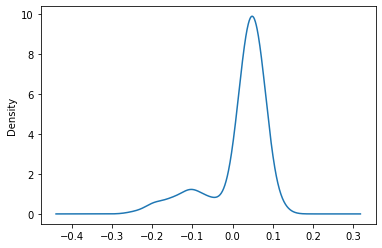

In [12]:
#Empirical densities
data["return_1"].iloc[0:500].plot.kde()
pass

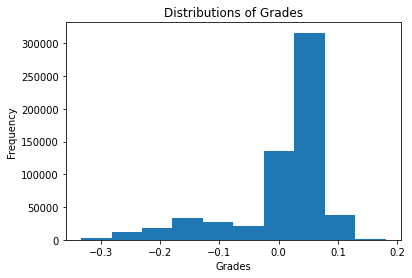

In [13]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(data['return_1'])
# set title and labels
ax.set_title('Distributions of Grades')
ax.set_xlabel('Grades')
ax.set_ylabel('Frequency')
pass

<AxesSubplot:ylabel='Frequency'>

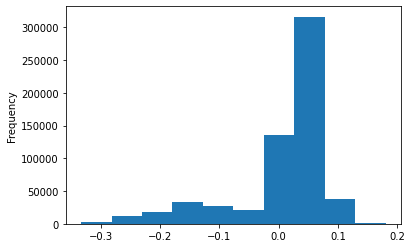

In [14]:
data['return_1'].plot.hist()


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

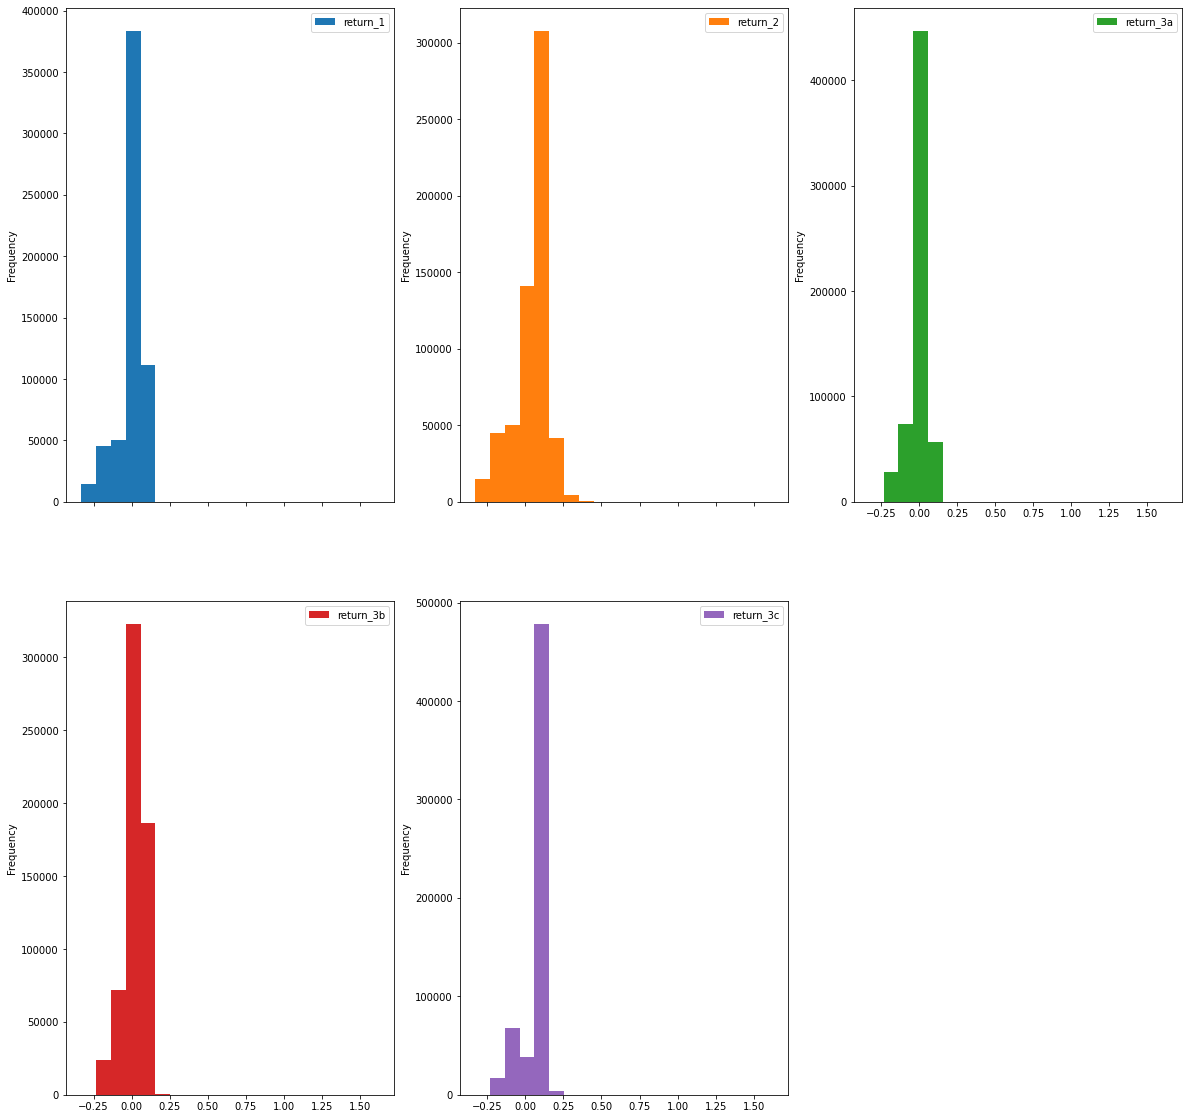

In [15]:
data[return_cols].plot.hist(subplots=True, layout=(2,3), figsize=(20, 20), bins=20)


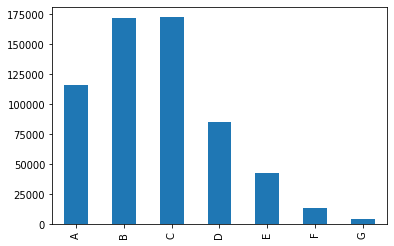

In [16]:
#bar charts: an example
data['grade'].value_counts().sort_index().plot.bar()
pass

In [17]:
#Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for
#creating attractive graphs. Seaborn has a lot to offer. You can create graphs in one line that would 
#take you multiple tens of lines in Matplotlib. Its standard designs are awesome and it 
#also has a nice interface for working with pandas dataframes.

import seaborn as sns 
%matplotlib inline

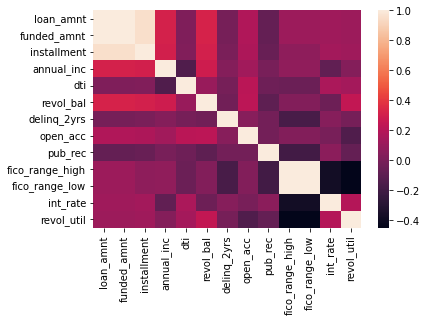

In [18]:
#A Heatmap is a graphical representation of data where the individual values contained in a matrix are 
#represented as colors. Heatmaps are perfect for exploring the correlation of features in a dataset.
#To get the correlation of the features inside a dataset we can call <dataset>.corr(), which is a 
#Pandas dataframe method. This will give us the correlation matrix.

sns.heatmap(data[continuous_features].corr(), annot=False)
pass

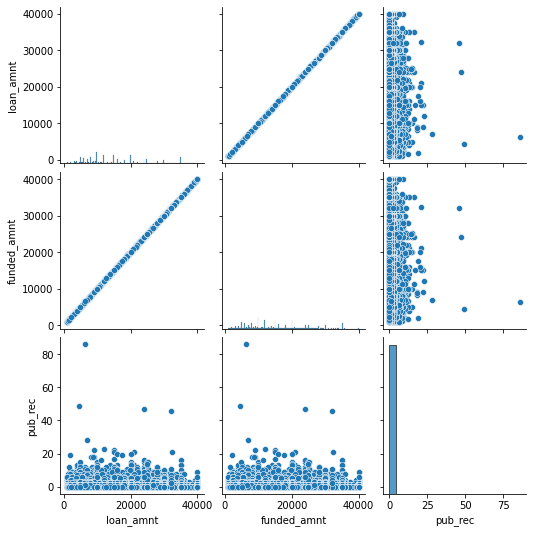

In [19]:
sns.pairplot(data[["loan_amnt","funded_amnt","pub_rec"]])


<AxesSubplot:xlabel='term', ylabel='count'>

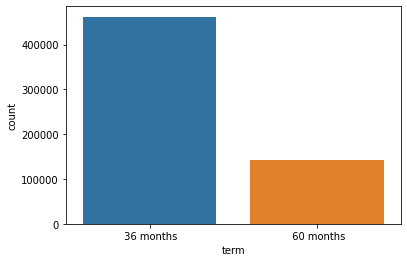

In [20]:
sns.countplot(x='term',data=data)

<AxesSubplot:xlabel='grade', ylabel='count'>

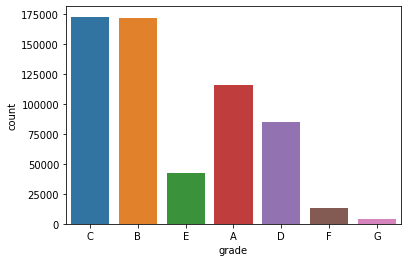

In [21]:
sns.countplot(x='grade',data=data)

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

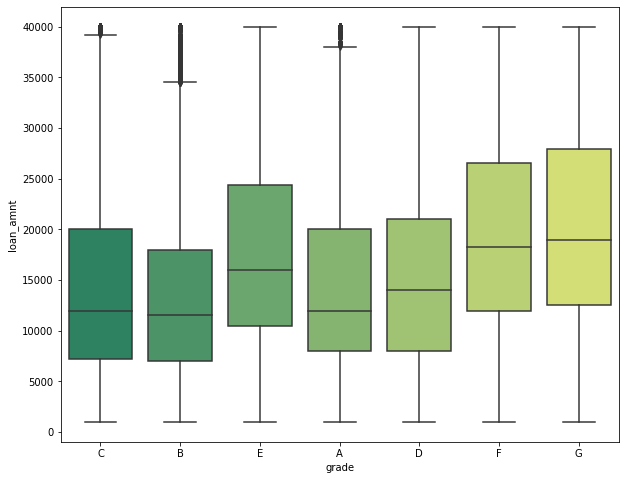

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(x='grade',y='loan_amnt',data=data,palette="summer")

<AxesSubplot:xlabel='funded_amnt'>

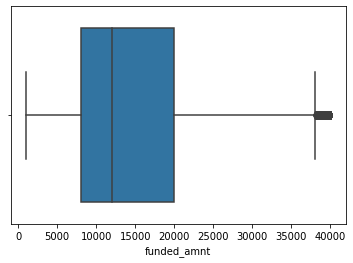

In [23]:
i=1
sns.boxplot(x=data[continuous_features[i]])


In [24]:
data.loan_status.value_counts()


Fully Paid     477373
Charged Off    127980
Default            21
Name: loan_status, dtype: int64

# Exercise 2 --- 9 or 10 lines of coding - [5/15]


In [9]:
#For this exercise, first, find the percentage of loans by grade in the dataset. 
#Second, for each grade category, find the average of int_rate and return_1 of the loans. 
#Third, find the precentage of loans defaulted in each grade category. Show your result in a table like
#below. Store the result in a Panda dataframe and call it combined.
#
#
#----------------------------------
#Write your code bellow

#----------------------------------
def f(df):
    return(pd.Series({
        'grade':len(df['grade']),
        'int_rate':  df['int_rate'].mean(),
        'return_1': df['return_1'].mean() *100,
        'default': sum(df['loan_status'] != 'Fully Paid')/ df['loan_status'].count() *100
    }))

combined = data.groupby(['grade']).apply(f)
combined['grade'] = combined['grade'] / combined['grade'].sum() * 100
#combined.columns
combined



,grade,int_rate,return_1,default
grade,,,,
A,19.184339,6.877237,1.649014,6.123802
B,28.356520,10.150223,1.324803,14.233120
C,28.562674,13.576124,0.427756,23.923868
D,14.029674,17.389625,-0.456187,33.344323
E,6.990885,20.601166,-1.382236,42.090215
F,2.179810,24.977874,-2.378748,50.545620
G,0.696099,28.598315,-3.714312,54.247746


In [29]:
# We add new columns to the data called "outcome" which indicates whether or not a loan is defaulted
data["outcome"] = data.loan_status.isin(["Charged Off", "Default"])
data["outcome"].head()


0    False
2    False
3    False
4    False
5    False
Name: outcome, dtype: bool

In [30]:
# Create a feature for the length of a person's credit history at the
# time the loan is issued
data['cr_hist'] = (data.issue_d - data.earliest_cr_line) / np.timedelta64(1, 'M')
continuous_features.append('cr_hist')

In [31]:
# Create a matrix of features and outcomes, convert categorical features using dummies. 
x_continuous = data[continuous_features]
x_discrete = pd.get_dummies(data["grade"], dummy_na = True, prefix_sep = "::", drop_first = False)
y = data.outcome.values

#store return values in y_return
y_return1 = data.return_1
y_return2 = data.return_2
y_return3a = data.return_3a
y_return3b = data.return_3b
y_return3c = data.return_3c

In [32]:
# For simplicity, we only consider the first seven discrete features as the space of
# features and the y_return1 as the resposne variable. 
#Split dataset into training set and test set for y_return1 for 60% training, 20% cross validation, and 20% testing
x_train, x_test, y_return_train, y_return_test = train_test_split(x_discrete.iloc[:,0:7], y_return1, test_size=0.4,
                                                                  random_state=default_seed) 
x_test, x_val, y_return_test, y_return_val = train_test_split(x_test, y_return_test, test_size=0.5,
                                                                  random_state=default_seed) 


In [33]:
#Performing a linear regression fitting for the return_1 with no regularization

grade_only_linear = LinearRegression()
grade_only_linear.fit(x_train, y_return_train)
parameters_linear = grade_only_linear.coef_

y_pred_linear = grade_only_linear.predict(x_test)

In [34]:
#Searching for the optimal regularization parameter using the cross validation dataset
#Using the cross validation set, we obtain the optimal alpha that minimizes the mean-square error
#of predicted returns on the cross validation set. 

error = []
error_val = []
alphas = range(0, 1000, 5)
for a in alphas:
    ridge_regular = linear_model.Ridge(alpha=a, fit_intercept=True)
    ridge_regular.fit(x_train, y_return_train)
    y_pred = ridge_regular.predict(x_train)
    y_pred_val = ridge_regular.predict(x_val)
   
    error.append(mean_squared_error(y_return_train, y_pred))
    error_val.append(mean_squared_error(y_pred_val, y_return_val))

min_index = error_val.index(min(error_val))
alpha_star = alphas[min_index]
print(alpha_star)
#--------------------------------------

565


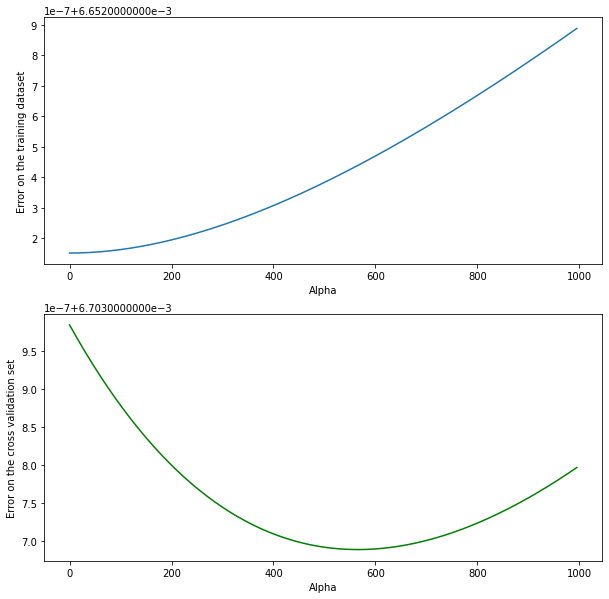

In [35]:
#The result of the last block could be shown graphically as follows:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(alphas,error)
plt.xlabel('Alpha')
plt.ylabel('Error on the training dataset')

plt.subplot(2, 1, 2)
plt.plot(alphas,error_val,color='green')
plt.xlabel('Alpha')
plt.ylabel('Error on the cross validation set')
plt.show()
#Look at the following figures; what do you observe?

In [36]:
#Now, we calcualte the mean-square error on the test dataset using the optimal alpha that we already obtained
#and the defaulted one used by the Ridge regression of the lienar model; see if the validation procedure has been
#effective


ridge_regular_optimal = linear_model.Ridge(alpha=alpha_star, fit_intercept=True)
ridge_regular = linear_model.Ridge(alpha=1, fit_intercept=True)

ridge_regular_optimal.fit(x_train,y_return_train)
y_pred = ridge_regular.fit(x_train, y_return_train).predict(x_test)
y_pred_optimal = ridge_regular_optimal.predict(x_test)

print(mean_squared_error(y_pred, y_return_test))
print(mean_squared_error(y_pred_optimal, y_return_test))



0.006653111637479146
0.006653430119746983


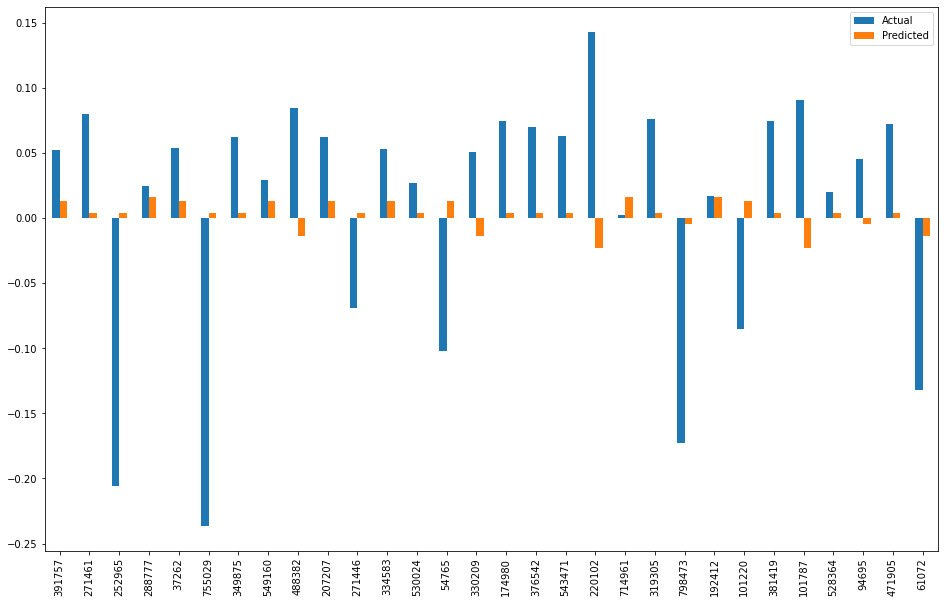

In [37]:
#Let us compare the predicted and actual predictoins of the ridge model.
y_pred_train = ridge_regular_optimal.predict(x_train)
df = pd.DataFrame({'Actual': y_return_train, 'Predicted': y_pred_train})
df1 = df.head(30)

df1.plot(kind='bar', figsize=(16,10))
plt.show()

# Exercise 3 - Max 300 words (excluding the pseudo code) (5/15)


You already know two approaches to measure the importance of features: linear regression and tree type models such as random forest. Explain how the concept of regularization in models such as ridge regression can be used to come up with another notion
of importance. 

Your explanations must include a pseudocode implementing an algorithm that shows how the importance of all the features are calculated and returned.

Your explanations should be right to the point, concise, clear, and free from spelling error and grammatically correct.

Write your answer below:



---

##### Why regularization brings feature importance:

- The objective function of linear regression with regularization:
$$
\sum \limits_{i=1}^n \Bigg(y_i -  \sum \limits_{j=1}^m x_{ij} \beta_j \Bigg) ^ 2 + \lambda \sum \limits_{j=1}^m |\beta_j|^p 

$$


 （ when p = 1 , it is called LASSO regression; and when p=2, called ridge regression. ）





(1) **The objective function shows:** The second term (a.k.a. the penalty term) tends to make coefficients shrink to 0 or around 0, while the first term (RSS) tends to minimize the prediction errors (in other words, RSS tends to make coefficient estimations close to the true value). Besides, $\lambda$ means the intensity of the punishment. Small $\lambda$ makes the objective function emphasizes RSS more, and vice versa.




(2) **Feature importance:** Changes in unimportant features' coefficients can't lead to large changes in RSS, while lead to large changes in the penalty term. So the coefficients of unimportant features could shrink to 0 (In LASSO regression) or around 0 (In ridge regression). Therefore, the more important the feature, the larger the absolute value of its coefficient. 


(3) **Tips 1 —— Standardization**: Features should have the same scale becuase the scale effects the value of coefficients. 


(4) **Tips 2 —— Multicollinearity**: Multicollinearity will weaken the meaning of feature importance because ridge regression tends to average the relevant variables' coefficients. For example, in a simple linear model $Y = 2X_1 + 2X_2 + 3X_3$, and $X_1, X_2$ are completely correlated. Actually, we can use only one variable to capture the effects from $X_1, X_2$, like $Y = 4X_{new} + 3X_3$. And $X_{new}$ is more important than $X_3$, but the old model tells us $X_3$ is most important. However, ridge regression can help to find out and exclude correlated variables because their coefficients tend to be similar or the same. 


(5) **Tips 3 —— optimal $\lambda$**： Use cross-validation to find the hypoparameter $\lambda$

---
##### How to calculate the importance (Pseudocode): 

**Pseudocode:**

*Input: dataset*

*Output: feature importance*

*Procedure:*


Step 0: Ensure that there is no multicollinearity among the features

Step 1: Standardize the dataset

Step 2: Split the dataset into train dataset and test dataset.

Step 3: Find the optimal hyperparameter $\lambda$ by using the K-fold cross-validation 


&emsp; (1) Divided the train dataset into K parts, denoted $\{K_1, K_2, K_3\ ... K_m\}$: 

&emsp; (2) For $\lambda_i$ in the range = {0.0001, 0.001, 0.01, 0.1, 1, 10 , 100, 1000, 10000, 100000}:{

&emsp;&emsp;&emsp;&ensp; For k in $\{K_1, K_2, ... K_m\}$:{

&emsp; &emsp;&ensp;&emsp;&emsp; Train the linear model with regularization using datasets $K-k$; And test the model using dataset $k$; And use dataset $k$ to calculate the residual sum of squares, denoted $RSS_{i,k}$

&emsp;&emsp;&emsp;&ensp; }

&emsp;&emsp;&ensp;  Calculate the $RSS_i$ = mean($RSS_{i,k}$)

&emsp;&emsp;&ensp; }

&emsp; (3) The better $\lambda$ is the one has the smallest $RSS_i$ among the range

&emsp; (4) We can do (1) - (3) for 2 or 3 times to narrow the range of $\lambda$ and then find the optimal $\lambda$


Step 4: Get the estimation of coefficients (A.K.A feature importance) under the optimal $\lambda$

- Use train dataset to build the linear model with regularization, and use the gradient descent to find the estimation of the coefficients.

Step 5: The feature importance is measured by the absolute value of coefficient estimation. 

Step 6: In addition, we can do feature selection after getting the feature importance. 

- In LASSO regulation, we use 0 as the threshold to determine whether a variable is important. In other regression with convex regularization like ridge regression, we need to find a benchmark as the threshold.  



